<a href="https://colab.research.google.com/github/Shailajgautam/FDV-AI-Intern-Task/blob/main/Intern_Week_2_task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AI Internship Week-2 Task-2:**




# **Importing Required Dependencies**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, classification_report, confusion_matrix


# **Importing CSV File**

In [ ]:
df = pd.read_csv("/content/sample_data/AviationData.csv",encoding='latin1')

<ipython-input-2-80b13e0d3653>:1: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/sample_data/AviationData.csv",encoding='latin1')


# **Visualizing the Data**

In [ ]:
# Display the first few rows of the DataFrame
print(df.head())

         Event.Id Investigation.Type Accident.Number  Event.Date  \
0  20001218X45444           Accident      SEA87LA080  1948-10-24   
1  20001218X45447           Accident      LAX94LA336  1962-07-19   
2  20061025X01555           Accident      NYC07LA005  1974-08-30   
3  20001218X45448           Accident      LAX96LA321  1977-06-19   
4  20041105X01764           Accident      CHI79FA064  1979-08-02   

          Location        Country   Latitude  Longitude Airport.Code  \
0  MOOSE CREEK, ID  United States        NaN        NaN          NaN   
1   BRIDGEPORT, CA  United States        NaN        NaN          NaN   
2    Saltville, VA  United States  36.922223 -81.878056          NaN   
3       EUREKA, CA  United States        NaN        NaN          NaN   
4       Canton, OH  United States        NaN        NaN          NaN   

  Airport.Name  ... Purpose.of.flight Air.carrier Total.Fatal.Injuries  \
0          NaN  ...          Personal         NaN                  2.0   
1         

In [ ]:
# Check the shape of the DataFrame
print(df.shape)

(87282, 31)


In [ ]:
# Get an overview of the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87282 entries, 0 to 87281
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                87282 non-null  object 
 1   Investigation.Type      87282 non-null  object 
 2   Accident.Number         87282 non-null  object 
 3   Event.Date              87282 non-null  object 
 4   Location                87230 non-null  object 
 5   Country                 87056 non-null  object 
 6   Latitude                33073 non-null  object 
 7   Longitude               33064 non-null  object 
 8   Airport.Code            49217 non-null  object 
 9   Airport.Name            51870 non-null  object 
 10  Injury.Severity         86399 non-null  object 
 11  Aircraft.damage         84272 non-null  object 
 12  Aircraft.Category       30783 non-null  object 
 13  Registration.Number     85900 non-null  object 
 14  Make                    87219 non-null

In [ ]:
# Calculate the percentage of null values in each column
null_percentages = (df.isnull().sum() / len(df)) * 100

# Display the null percentages
print("Null percentages:")
print(null_percentages)

Null percentages:
Event.Id                   0.000000
Investigation.Type         0.000000
Accident.Number            0.000000
Event.Date                 0.000000
Location                   0.059577
Country                    0.258931
Latitude                  62.107880
Longitude                 62.118192
Airport.Code              43.611512
Airport.Name              40.571939
Injury.Severity            1.011663
Aircraft.damage            3.448592
Aircraft.Category         64.731560
Registration.Number        1.583373
Make                       0.072180
Model                      0.105405
Amateur.Built              0.116863
Number.of.Engines          6.586696
Engine.Type                6.771156
FAR.Description           65.103916
Schedule                  85.873376
Purpose.of.flight          6.632524
Air.carrier               81.701840
Total.Fatal.Injuries      13.062258
Total.Serious.Injuries    14.332852
Total.Minor.Injuries      13.671777
Total.Uninjured            6.773447
Weather.Co

In [ ]:
# Drop columns with high null percentage
high_null_cols = null_percentages[null_percentages > 35].index
df_cleaned = df.drop(columns=high_null_cols)


In [ ]:
# Calculate the percentage of null values in each column
null_percentages = (df_cleaned.isnull().sum() / len(df_cleaned)) * 100

# Display the null percentages
print("Null percentages:")
print(null_percentages)

Null percentages:
Event.Id                   0.000000
Investigation.Type         0.000000
Accident.Number            0.000000
Event.Date                 0.000000
Location                   0.059577
Country                    0.258931
Injury.Severity            1.011663
Aircraft.damage            3.448592
Registration.Number        1.583373
Make                       0.072180
Model                      0.105405
Amateur.Built              0.116863
Number.of.Engines          6.586696
Engine.Type                6.771156
Purpose.of.flight          6.632524
Total.Fatal.Injuries      13.062258
Total.Serious.Injuries    14.332852
Total.Minor.Injuries      13.671777
Total.Uninjured            6.773447
Weather.Condition          4.557641
Broad.phase.of.flight     29.282097
Report.Status              5.974886
Publication.Date          15.642400
dtype: float64


# Cleaning Event.Id

In [ ]:
# Get unique data from the 'Event.Id' column in the cleaned DataFrame
unique_event_id = df_cleaned['Event.Id'].unique()

# Display the unique data
print("Unique data from Event.Id in the cleaned DataFrame:")
print(unique_event_id)

# Check for duplicates
duplicates = df_cleaned['Event.Id'].duplicated().sum()
print("Number of duplicate Event.Id:", duplicates)


Unique data from Event.Id in the cleaned DataFrame:
['20001218X45444' '20001218X45447' '20061025X01555' ... '20211227104443'
 '20211230104454' '20211214104403']
Number of duplicate Event.Id: 912


In [ ]:
# Drop duplicate event IDs
df_cleaned.drop_duplicates(subset=['Event.Id'], keep='first', inplace=True)


# Cleaning Investigation.Type

In [ ]:
# Get unique data from the 'Investigation.Type' column in the cleaned DataFrame
unique_investigation_type = df_cleaned['Investigation.Type'].unique()

# Display the unique data
print("Unique data from Investigation.Type in the cleaned DataFrame:")
print(unique_investigation_type)


Unique data from Investigation.Type in the cleaned DataFrame:
['Accident' 'Incident']


In [ ]:
# Check for missing values in the 'Investigation.Type' column
null_values = df_cleaned['Investigation.Type'].isnull().sum()

# Display the number of missing values
print("Number of missing values in Investigation.Type:", null_values)


Number of missing values in Investigation.Type: 0


# Cleaning Accident Number

In [ ]:
# Get unique data from the 'Accident.Number' column in the cleaned DataFrame
unique_accident_number = df_cleaned['Accident.Number'].unique()

# Display the unique data
print("Unique data from Accident.Number in the cleaned DataFrame:")
print(unique_accident_number)

# Check for duplicates
duplicates = df_cleaned['Accident.Number'].duplicated().sum()
print("Number of duplicate accident numbers:", duplicates)

Unique data from Accident.Number in the cleaned DataFrame:
['SEA87LA080' 'LAX94LA336' 'NYC07LA005' ... 'CEN22FA082' 'ERA22LA097'
 'GAA22WA047']
Number of duplicate accident numbers: 0


# Cleaning Event Date

In [ ]:
# Get unique data from the 'Event.Date' column in the cleaned DataFrame
unique_event_date = df_cleaned['Event.Date'].unique()

# Display the unique data
print("Unique data from Event.Date in the cleaned DataFrame:")
print(unique_event_date)


Unique data from Event.Date in the cleaned DataFrame:
['1948-10-24' '1962-07-19' '1974-08-30' ... '2021-12-26' '2021-12-29'
 '2022-12-08']


In [ ]:
from datetime import datetime

# Convert 'Event.Date' column to datetime format and catch any errors
errors = []
for date_str in df_cleaned['Event.Date']:
    try:
        # Attempt to parse the date string
        datetime.strptime(date_str, '%Y-%m-%d')
    except ValueError:
        # If an error occurs, add the date string to the list of errors
        errors.append(date_str)

# Print any errors found
if errors:
    print("Formatting errors found in 'Event.Date':")
    for error in errors:
        print(error)
else:
    print("No formatting errors found in 'Event.Date'.")


No formatting errors found in 'Event.Date'.


# Cleaning Location

In [ ]:
# Drop rows with missing values in the 'Location' column
df_cleaned.dropna(subset=['Location'], inplace=True)

# Get unique data from the 'Location' column in the cleaned DataFrame
unique_location = df_cleaned['Location'].unique()

# Display the unique data
print("Unique data from Location in the cleaned DataFrame after dropping missing values:")
print(unique_location)


Unique data from Location in the cleaned DataFrame after dropping missing values:
['MOOSE CREEK, ID' 'BRIDGEPORT, CA' 'Saltville, VA' ... 'Auxerre, OF'
 'Hardy, AR' 'La Aurora, OF']


In [ ]:
# Define a dictionary mapping US state abbreviations to their full names
us_states = {
    'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas', 'CA': 'California',
    'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware', 'FL': 'Florida', 'GA': 'Georgia',
    'HI': 'Hawaii', 'ID': 'Idaho', 'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa',
    'KS': 'Kansas', 'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland',
    'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi', 'MO': 'Missouri',
    'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada', 'NH': 'New Hampshire', 'NJ': 'New Jersey',
    'NM': 'New Mexico', 'NY': 'New York', 'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio',
    'OK': 'Oklahoma', 'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina',
    'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah', 'VT': 'Vermont',
    'VA': 'Virginia', 'WA': 'Washington', 'WV': 'West Virginia', 'WI': 'Wisconsin', 'WY': 'Wyoming'
}

# Function to update location
def update_location(location):
    parts = location.split(', ')
    state = parts[-1]
    if state in us_states:
        parts[-1] = us_states[state]
    else:
        parts[-1] = state
    # Remove "OF" if present
    parts = [part for part in parts if part.upper() != 'OF']
    # Append "United States of America" if not already present
    if "United States of America" not in parts:
        parts.append("United States of America")
    # Capitalize the first letter of each word
    updated_parts = [part.capitalize() for part in parts]
    return ', '.join(updated_parts)


# Extract unique locations from the 'Location' column in the DataFrame
unique_locations = df_cleaned['Location'].unique()

# Update unique locations using the update_location function
updated_locations = [update_location(location) for location in unique_locations]

# Update the 'Location' column in df_cleaned with the updated locations
df_cleaned['Location'] = df_cleaned['Location'].apply(update_location)


In [ ]:
# Get unique data from the 'Location' column in the cleaned DataFrame
unique_location = df_cleaned['Location'].unique()

# Display the unique data
print("Unique data from Location in the cleaned DataFrame:")
print(unique_location)

Unique data from Location in the cleaned DataFrame:
['Moose creek, Idaho, United states of america'
 'Bridgeport, California, United states of america'
 'Saltville, Virginia, United states of america' ...
 'Newcastle, United states of america' 'Auxerre, United states of america'
 'La aurora, United states of america']


# Cleaning Country

In [ ]:
# Get unique data from the 'Country' column in the cleaned DataFrame
unique_country = df_cleaned['Country'].unique()

# Display the unique data
print("Unique data from Country in the cleaned DataFrame:")
print(unique_country)

Unique data from Country in the cleaned DataFrame:
['United States' nan 'GULF OF MEXICO' 'Puerto Rico' 'ATLANTIC OCEAN'
 'HIGH ISLAND' 'Bahamas' 'MISSING' 'Angola' 'Germany' 'Korea, Republic Of'
 'American Samoa' 'PACIFIC OCEAN' 'Canada' 'Bolivia' 'Mexico' 'Dominica'
 'Netherlands Antilles' 'Iceland' 'Greece' 'Guam' 'Australia'
 'CARIBBEAN SEA' 'West Indies' 'Japan' 'Philippines' 'Venezuela' 'Bermuda'
 'San Juan Islands' 'Colombia' 'El Salvador' 'United Kingdom'
 'British Virgin Islands' 'Netherlands' 'Costa Rica' 'Mozambique'
 'Jamaica' 'Panama' 'Guyana' 'Norway' 'Portugal' 'Malaysia'
 'Turks And Caicos Islands' 'Northern Mariana Islands'
 'Dominican Republic' 'Suriname' 'Honduras' 'Congo' 'Belize' 'Guatemala'
 'France' 'St Vincent And The Grenadines' 'Haiti' 'Papua New Guinea'
 'Cayman Islands' 'Sweden' 'Taiwan' 'Senegal' 'Barbados' 'BLOCK 651A'
 'Brazil' 'Mauritius' 'Argentina' 'Kenya' 'Ecuador' 'Aruba' 'Saudi Arabia'
 'Cuba' 'Italy' 'French Guiana' 'Denmark' 'Sudan' 'Spain'
 'Feder

In [ ]:
pip install pycountry

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 28.7 MB/s eta 0:00:00


In [ ]:
import pycountry

# Drop rows with missing values in the 'Country' column
df_cleaned.dropna(subset=['Country'], inplace=True)

# Drop rows where the 'Country' column contains the value 'Unknown'
df_cleaned = df_cleaned[df_cleaned['Country'] != 'Unknown']

# Standardize the format of countries
def standardize_country(country):
    # Convert to title case and strip leading/trailing whitespace
    return country.title().strip()

# Apply the standardization function to 'Country' column
df_cleaned['Country'] = df_cleaned['Country'].apply(standardize_country)


# Correct incorrect country format
df_cleaned['Country'] = df_cleaned['Country'].replace({'Korea, Republic Of': 'South Korea'})

# Get a set of valid country names from the pycountry library
valid_countries = set([country.name for country in pycountry.countries])

# Function to check if a country name is legitimate
def is_legitimate_country(country):
    return country in valid_countries

# Apply the function to the 'Country' column
df_cleaned['Country'] = df_cleaned['Country'].apply(lambda x: x if is_legitimate_country(x) else 'Unknown')

# Display unique data from 'Country' after replacing missing values and standardization
unique_countries = df_cleaned['Country'].unique()
print("\nUnique data from Country in the cleaned DataFrame after replacing missing values and standardization:")
print(unique_countries)



Unique data from Country in the cleaned DataFrame after replacing missing values and standardization:
['United States' 'Unknown' 'Puerto Rico' 'Bahamas' 'Angola' 'Germany'
 'American Samoa' 'Canada' 'Mexico' 'Dominica' 'Iceland' 'Greece' 'Guam'
 'Australia' 'Japan' 'Philippines' 'Bermuda' 'Colombia' 'El Salvador'
 'United Kingdom' 'Netherlands' 'Costa Rica' 'Mozambique' 'Jamaica'
 'Panama' 'Guyana' 'Norway' 'Portugal' 'Malaysia'
 'Northern Mariana Islands' 'Dominican Republic' 'Suriname' 'Honduras'
 'Congo' 'Belize' 'Guatemala' 'France' 'Haiti' 'Papua New Guinea'
 'Cayman Islands' 'Sweden' 'Senegal' 'Barbados' 'Brazil' 'Mauritius'
 'Argentina' 'Kenya' 'Ecuador' 'Aruba' 'Saudi Arabia' 'Cuba' 'Italy'
 'French Guiana' 'Denmark' 'Sudan' 'Spain' 'Central African Republic'
 'Algeria' 'Nicaragua' 'Marshall Islands' 'Switzerland' 'Poland' 'Belarus'
 'Austria' 'Malta' 'Cameroon' 'Solomon Islands' 'Peru' 'Croatia'
 'Martinique' 'South Africa' 'India' 'Ethiopia' 'Ireland' 'Chile' 'Uganda'
 'Chin

<ipython-input-21-b7a3dd2e8a1f>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Country'] = df_cleaned['Country'].apply(standardize_country)
<ipython-input-21-b7a3dd2e8a1f>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Country'] = df_cleaned['Country'].replace({'Korea, Republic Of': 'South Korea'})
<ipython-input-21-b7a3dd2e8a1f>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

# Cleaning Injury Severity

In [ ]:
# Get unique data from the 'Location' column in the cleaned DataFrame
unique_injury_severity = df_cleaned['Injury.Severity'].unique()

# Display the unique data
print("Unique data from Injury.Severity  in the cleaned DataFrame:")
print(unique_injury_severity)

Unique data from Injury.Severity  in the cleaned DataFrame:
['Fatal(2)' 'Fatal(4)' 'Fatal(3)' 'Fatal(1)' 'Non-Fatal' 'Incident'
 'Fatal(8)' 'Fatal(78)' 'Fatal(7)' 'Fatal(6)' 'Fatal(5)' 'Fatal(153)'
 'Fatal(12)' 'Fatal(14)' 'Fatal(23)' 'Fatal(10)' 'Fatal(11)' 'Fatal(17)'
 'Fatal(13)' 'Fatal(29)' 'Fatal(70)' 'Fatal(9)' 'Unavailable' 'Fatal(135)'
 'Fatal(31)' 'Fatal(256)' 'Fatal(25)' 'Fatal(82)' 'Fatal(156)' 'Fatal(28)'
 'Fatal(18)' 'Fatal(43)' 'Fatal(270)' 'Fatal(144)' 'Fatal(174)'
 'Fatal(111)' 'Fatal(131)' 'Fatal(20)' 'Fatal(73)' 'Fatal(27)' 'Fatal(34)'
 'Fatal(87)' 'Fatal(30)' 'Fatal(16)' 'Fatal(47)' 'Fatal(56)' 'Fatal(37)'
 'Fatal(132)' 'Fatal(68)' 'Fatal(15)' 'Fatal(54)' 'Fatal(52)' 'Fatal(65)'
 'Fatal(72)' 'Fatal(160)' 'Fatal(189)' 'Fatal(123)' 'Fatal(33)'
 'Fatal(110)' 'Fatal(230)' 'Fatal(97)' 'Fatal(349)' 'Fatal(125)'
 'Fatal(35)' 'Fatal(228)' 'Fatal(75)' 'Fatal(104)' 'Fatal(229)'
 'Fatal(80)' 'Fatal(217)' 'Fatal(169)' 'Fatal(88)' 'Fatal(19)' 'Fatal(60)'
 'Fatal(113)' 'Fatal(143)

In [ ]:
def extract_death_count(entry):
    if isinstance(entry, str) and entry.startswith('Fatal'):
        try:
            return int(entry.split('(')[1].split(')')[0])
        except:
            return 0  # Replace invalid entries with 0
    else:
        return 0  # Replace non-fatal and unknown entries with 0

def classify_injury_severity(entry):
    if isinstance(entry, str) and entry.startswith('Fatal'):
        return 'Fatal'
    elif entry == 'Non-Fatal':
        return 'Non-Fatal'
    else:
        return 'Unknown'

# Apply the functions to create new columns
df_cleaned['Injury_Severity'] = df_cleaned['Injury.Severity'].apply(classify_injury_severity)
df_cleaned['Total_Fatal_Injuries'] = df_cleaned['Injury.Severity'].apply(extract_death_count)

# Drop rows with missing or unknown values in the 'Injury_Severity' column
df_cleaned = df_cleaned.dropna(subset=['Injury_Severity'])

# Drop the original 'Injury.Severity' column
df_cleaned.drop(columns=['Injury.Severity'], inplace=True)

# Display the resulting DataFrame
print(df_cleaned[['Injury_Severity', 'Total_Fatal_Injuries']])


      Injury_Severity  Total_Fatal_Injuries
0               Fatal                     2
1               Fatal                     4
2               Fatal                     3
3               Fatal                     2
4               Fatal                     1
...               ...                   ...
87277           Fatal                     0
87278       Non-Fatal                     0
87279           Fatal                     0
87280       Non-Fatal                     0
87281       Non-Fatal                     0

[86095 rows x 2 columns]


# Cleaning Aircraft Damage

In [ ]:
# Get unique data from the 'Location' column in the cleaned DataFrame
unique_aircraft_damage = df_cleaned['Aircraft.damage'].unique()

# Display the unique data
print("Unique data from Location  in the cleaned DataFrame:")
print(unique_aircraft_damage)

Unique data from Location  in the cleaned DataFrame:
['Destroyed' 'Substantial' 'Minor' nan 'Unknown']


In [ ]:
# Drop rows where the 'Aircraft.damage' column contains NaN or 'Unknown'
df_cleaned = df_cleaned.dropna(subset=['Aircraft.damage'])
df_cleaned = df_cleaned[df_cleaned['Aircraft.damage'] != 'Unknown']

# Get unique data from the 'Aircraft.damage' column in the cleaned DataFrame after dropping NaN and 'Unknown'
unique_aircraft_damage = df_cleaned['Aircraft.damage'].unique()

# Display the unique data
print("Unique data from Aircraft.damage in the cleaned DataFrame after dropping NaN and 'Unknown':")
print(unique_aircraft_damage)



Unique data from Aircraft.damage in the cleaned DataFrame after dropping NaN and 'Unknown':
['Destroyed' 'Substantial' 'Minor']


In [ ]:
# Check for null values in the 'Aircraft.damage' column
null_values_aircraft_damage = df_cleaned['Aircraft.damage'].isnull().sum()

# Display the count of null values in the 'Aircraft.damage' column
print("Null values in the 'Aircraft.damage' column:", null_values_aircraft_damage)


Null values in the 'Aircraft.damage' column: 0


# Cleaning Registration Number

In [ ]:
# Replace NaN values in the 'Registration.Number' column with 'Unknown'
df_cleaned['Registration.Number'].fillna('Unknown', inplace=True)

# Display the unique data from the 'Registration.Number' column after replacing NaN values
unique_registration_number = df_cleaned['Registration.Number'].unique()
print("Unique data from Registration.Number in the cleaned DataFrame:")
print(unique_registration_number)

# Check for duplicates
duplicates = df_cleaned['Registration.Number'].duplicated().sum()
print("Number of duplicate Registration.Number:", duplicates)

Unique data from Registration.Number in the cleaned DataFrame:
['NC6404' 'N5069P' 'N5142R' ... 'G-OBUC' 'N565CK' 'N74521']
Number of duplicate Registration.Number: 8758


In [ ]:
# Drop the 'Registration.Number' column
df_cleaned.drop(columns=['Registration.Number'], inplace=True)

# Check for duplicates in the DataFrame
duplicates = df_cleaned.duplicated().sum()
print("Number of duplicate rows in the DataFrame:", duplicates)


Number of duplicate rows in the DataFrame: 0


In [ ]:
# Calculate the percentage of null values in each column
null_percentages = (df_cleaned.isnull().sum() / len(df_cleaned)) * 100

# Display the null percentages
print("Null percentages:")
print(null_percentages)

Null percentages:
Event.Id                   0.000000
Investigation.Type         0.000000
Accident.Number            0.000000
Event.Date                 0.000000
Location                   0.000000
Country                    0.000000
Aircraft.damage            0.000000
Make                       0.054138
Model                      0.086621
Amateur.Built              0.096245
Number.of.Engines          5.568990
Engine.Type                5.756668
Purpose.of.flight          5.082951
Total.Fatal.Injuries      12.977467
Total.Serious.Injuries    14.440394
Total.Minor.Injuries      13.605467
Total.Uninjured            6.918829
Weather.Condition          3.545434
Broad.phase.of.flight     28.721984
Report.Status              5.155135
Publication.Date          15.519544
Injury_Severity            0.000000
Total_Fatal_Injuries       0.000000
dtype: float64


# Cleaning Make

In [ ]:
# Drop rows with NaN and 'Unknown' values in the 'Make' column
df_cleaned = df_cleaned[(df_cleaned['Make'].notna()) & (df_cleaned['Make'] != 'Unknown')]

# Display the unique data from the 'Make' column after dropping NaN and 'Unknown' values
unique_make = df_cleaned['Make'].unique()
print("Unique data from Make in the cleaned DataFrame after dropping NaN and 'Unknown' values:")
print(unique_make)


Unique data from Make in the cleaned DataFrame after dropping NaN and 'Unknown' values:
['Stinson' 'Piper' 'Cessna' ... 'MONTE CLARK' 'CHR International'
 'Mini-MAX']


In [ ]:
# Drop rows with NaN and 'Unknown' values in the 'Make' column
df_cleaned = df_cleaned[(df_cleaned['Make'].notna()) & (df_cleaned['Make'] != 'Unknown')]

# Convert all strings to lowercase in the 'Make' column
df_cleaned['Make'] = df_cleaned['Make'].str.lower()

# Display the unique data from the 'Make' column after dropping NaN and 'Unknown' values
unique_make = df_cleaned['Make'].unique()
print("Unique data from Make in the cleaned DataFrame after dropping NaN and 'Unknown' values:")
print(unique_make)


Unique data from Make in the cleaned DataFrame after dropping NaN and 'Unknown' values:
['stinson' 'piper' 'cessna' ... 'monte clark' 'chr international'
 'mini-max']


# Cleaning Model

In [ ]:
# Drop rows with NaN and 'Unknown' values in the 'Model' column
df_cleaned = df_cleaned[(df_cleaned['Model'].notna()) & (df_cleaned['Model'] != 'Unknown')]

# Convert all strings to lowercase in the 'Model' column
df_cleaned['Model'] = df_cleaned['Model'].str.lower()

# Display the unique data from the 'Model' column after dropping NaN and 'Unknown' values
unique_model = df_cleaned['Model'].unique()
print("Unique data from Model in the cleaned DataFrame after dropping NaN and 'Unknown' values:")
print(unique_model)


Unique data from Model in the cleaned DataFrame after dropping NaN and 'Unknown' values:
['108-3' 'pa24-180' '172m' ... 'nieuport-12' 'a320-251n' '1600r sport']


# Cleaning Amateur Built

In [ ]:
# Display the unique data from the 'Amateur.Built' column after replacing NaN values
unique_amateur_built  = df_cleaned['Amateur.Built'].unique()
print("Unique data from Amateur.Built  in the cleaned DataFrame:")
print(unique_amateur_built)

Unique data from Amateur.Built  in the cleaned DataFrame:
['No' 'Yes' nan 'Y' 'N']


In [ ]:
# Replace 'Yes' and 'Y' with True, and 'No' and 'N' with False in the 'Amateur.Built' column
df_cleaned['Amateur.Built'] = df_cleaned['Amateur.Built'].replace({'Yes': True, 'Y': True, 'No': False, 'N': False})

# Drop rows with NaN values in the 'Amateur.Built' column
df_cleaned = df_cleaned.dropna(subset=['Amateur.Built'])

# Display the unique data from the 'Amateur.Built' column after replacing and dropping values
unique_amateur_built = df_cleaned['Amateur.Built'].unique()
print("Unique data from Amateur.Built in the cleaned DataFrame after replacing and dropping values:")
print(unique_amateur_built)


Unique data from Amateur.Built in the cleaned DataFrame after replacing and dropping values:
[False True]


# Cleaning No. of Engines

In [ ]:
# Display the unique data from the 'Number.of.Engines' column after replacing NaN values
unique_number_of_engines  = df_cleaned['Number.of.Engines'].unique()
print("Unique data from Number.of.Engines  in the cleaned DataFrame:")
print(unique_number_of_engines )

Unique data from Number.of.Engines  in the cleaned DataFrame:
[ 1. nan  2.  0.  4.  3.  8.]


In [ ]:
# Drop rows with NaN and 0 values in the 'Number.of.Engines' column
df_cleaned = df_cleaned.dropna(subset=['Number.of.Engines'])
df_cleaned = df_cleaned[df_cleaned['Number.of.Engines'] != 0]

# Display the unique data from the 'Number.of.Engines' column after dropping values
unique_number_of_engines = df_cleaned['Number.of.Engines'].unique()
print("Unique data from Number.of.Engines in the cleaned DataFrame after dropping values:")
print(unique_number_of_engines)


Unique data from Number.of.Engines in the cleaned DataFrame after dropping values:
[1. 2. 4. 3. 8.]


# Cleaning Engine Type

In [ ]:
# Display the unique data from the 'Engine.Type ' column after replacing NaN values
unique_type_of_engines  = df_cleaned['Engine.Type'].unique()
print("Unique type of Engine.Type in the cleaned DataFrame:")
print(unique_type_of_engines )


Unique type of Engine.Type in the cleaned DataFrame:
['Reciprocating' 'Turbo Fan' 'Turbo Shaft' 'Turbo Prop' 'Turbo Jet'
 'Unknown' nan 'Electric' 'Hybrid Rocket' 'Geared Turbofan' 'LR']


In [ ]:
# Drop rows with NaN and 'Unknown' values in the 'Engine.Type' column
df_cleaned = df_cleaned.dropna(subset=['Engine.Type'])
df_cleaned = df_cleaned[df_cleaned['Engine.Type'] != 'Unknown']

# Display the unique data from the 'Engine.Type' column after dropping values
unique_type_of_engines = df_cleaned['Engine.Type'].unique()
print("Unique type of Engine.Type in the cleaned DataFrame after dropping values:")
print(unique_type_of_engines)


Unique type of Engine.Type in the cleaned DataFrame after dropping values:
['Reciprocating' 'Turbo Fan' 'Turbo Shaft' 'Turbo Prop' 'Turbo Jet'
 'Electric' 'Hybrid Rocket' 'Geared Turbofan' 'LR']


# Cleaning Purpose Of Flight

In [ ]:
# Display the unique data from the 'Purpose.of.flight' column after replacing NaN values
unique_purpose_of_flight  = df_cleaned['Purpose.of.flight'].unique()
print("Unique data from Purpose.of.flight in the cleaned DataFrame:")
print(unique_purpose_of_flight)

Unique data from Purpose.of.flight in the cleaned DataFrame:
['Personal' nan 'Business' 'Instructional' 'Unknown' 'Ferry'
 'Executive/corporate' 'Aerial Observation' 'Aerial Application'
 'Public Aircraft' 'Skydiving' 'Other Work Use' 'Positioning'
 'Flight Test' 'Air Race/show' 'Air Drop' 'Public Aircraft - Federal'
 'Glider Tow' 'Public Aircraft - Local' 'External Load'
 'Public Aircraft - State' 'Banner Tow' 'Firefighting' 'BANT' 'GLDT'
 'EXLD' 'PUBU' 'Air Race show' 'ADRP']


In [ ]:
# Dictionary mapping incorrect values to correct ones
corrections = {
    'Air Race show': 'Air Race/show',
    'EXLD': 'External Load',
    'BANT': 'Banner Tow',
    'GLDT': 'Glider Tow',
    'PUBU': 'Public Aircraft - Federal',
    'ADRP': 'Air Drop'
}

# Clean the data
df_cleaned['Purpose.of.flight'].replace(corrections, inplace=True)

# Drop NaN values from the 'Purpose.of.flight' column
df_cleaned = df_cleaned.dropna(subset=['Purpose.of.flight'])

# Display unique data after cleaning
unique_purpose_of_flight = df_cleaned['Purpose.of.flight'].unique()
print("Unique data from Purpose.of.flight in the cleaned DataFrame after cleaning:")
print(unique_purpose_of_flight)


Unique data from Purpose.of.flight in the cleaned DataFrame after cleaning:
['Personal' 'Business' 'Instructional' 'Unknown' 'Ferry'
 'Executive/corporate' 'Aerial Observation' 'Aerial Application'
 'Public Aircraft' 'Skydiving' 'Other Work Use' 'Positioning'
 'Flight Test' 'Air Race/show' 'Air Drop' 'Public Aircraft - Federal'
 'Glider Tow' 'Public Aircraft - Local' 'External Load'
 'Public Aircraft - State' 'Banner Tow' 'Firefighting']


# Cleaning total fatel injuries (Dropped it)

In [ ]:
# Display the unique data from the 'Total.Fatal.Injuries' column after replacing NaN values
unique_total_fatal_injuries  = df_cleaned['Total.Fatal.Injuries'].unique()
print("Unique data from Total.Fatal.Injuries in the cleaned DataFrame:")
print(unique_total_fatal_injuries)

Unique data from Total.Fatal.Injuries in the cleaned DataFrame:
[  2.   4.   3.   0.   1.   8.  78.  nan   7.   6.   5. 153.  12.  14.
  23.  10.  11.  17.  13.  29.  70.   9. 135.  31. 256.  25.  82. 156.
  28.  18.  43. 270. 144. 174. 111. 131.  20.  73.  34.  27.  16.  37.
 132.  68.  15. 110. 230. 228. 217.  88.]


In [ ]:
# Drop the 'Total.Fatal.Injuries' column
df_cleaned.drop(columns=['Total.Fatal.Injuries'], inplace=True)

# Cleaning Total Serious Injuries

In [ ]:
# Display the unique data from the 'Total.Serious.Injuries' column after replacing NaN values
unique_total_serious_injuries  = df_cleaned['Total.Serious.Injuries'].unique()
print("Unique data from Total.Serious.Injuries in the cleaned DataFrame:")
print(unique_total_serious_injuries)

Unique data from Total.Serious.Injuries in the cleaned DataFrame:
[ 0. nan  1.  2.  6.  4.  5. 10.  3.  8.  9.  7. 15. 17. 28. 26. 47. 14.
 81. 13. 60. 16. 45.]


In [ ]:
# Drop rows with missing values in the 'Total.Serious.Injuries' column
df_cleaned.dropna(subset=['Total.Serious.Injuries'], inplace=True)

# Display unique data from the cleaned DataFrame after dropping missing values
unique_total_serious_injuries = df_cleaned['Total.Serious.Injuries'].unique()
print("Unique data from Total.Serious.Injuries in the cleaned DataFrame after dropping missing values:")
print(unique_total_serious_injuries)

Unique data from Total.Serious.Injuries in the cleaned DataFrame after dropping missing values:
[ 0.  1.  2.  6.  4.  5. 10.  3.  8.  9.  7. 15. 17. 28. 26. 47. 14. 81.
 13. 60. 16. 45.]


# Cleaning Total Minor Injuries

In [ ]:
# Display the unique data from the 'Total.Minor.Injuries' column after replacing NaN values
unique_total_minor_injuries  = df_cleaned['Total.Minor.Injuries'].unique()
print("Unique data from Total.Minor.Injuries in the cleaned DataFrame:")
print(unique_total_minor_injuries)

Unique data from Total.Minor.Injuries in the cleaned DataFrame:
[  0.   3.   1.   2.   4.  24.   6.   5.  25.  19.  nan  33.   8.  13.
  15.   7.   9.  16.  20.  14.  11.  10.  38.  29.  17.  62.  31.  39.
  32.  18.  27.  57.  50. 125.  26.  36.  12.  21.  96.  30.  22.  58.
  23.  28.  65.  71.  42.]


In [ ]:
# Drop rows with missing values in the 'Total.Minor.Injuries' column
df_cleaned.dropna(subset=['Total.Minor.Injuries'], inplace=True)

# Display unique data from the updated 'Total.Minor.Injuries' column
unique_total_minor_injuries = df_cleaned['Total.Minor.Injuries'].unique()
print("Unique data from Total.Minor.Injuries in the cleaned DataFrame:")
print(unique_total_minor_injuries)


Unique data from Total.Minor.Injuries in the cleaned DataFrame:
[  0.   3.   1.   2.   4.  24.   6.   5.  25.  19.  33.   8.  13.  15.
   7.   9.  16.  20.  14.  11.  10.  38.  29.  17.  62.  31.  39.  32.
  18.  27.  57.  50. 125.  26.  36.  12.  21.  96.  30.  22.  58.  23.
  28.  65.  71.  42.]


# Cleaning Total Uninjured

In [ ]:
# Display the unique data from the 'Total.Uninjured' column after replacing NaN values
unique_total_uninjured  = df_cleaned['Total.Uninjured'].unique()
print("Unique data from Total.Uninjured in the cleaned DataFrame:")
print(unique_total_uninjured)

Unique data from Total.Uninjured in the cleaned DataFrame:
[  0.   2.   1.   3.   6.   4.  12. 182. 154.   5. 119.  36.  51.  16.
   7.   9.  30.  18.   8. 108.  11.  68. 152.  10.  21. 113.  13.  84.
 142.  nan 129. 102. 393.  20.  17.  65. 136.  23. 116.  58.  31. 201.
 412. 159.  39.  74. 186.  82.  95.  29.  44. 245.  52.  25. 131. 180.
 150.  15. 125. 440.  86.  77. 133.  19.  66.  87.  49.  73. 104. 250.
  33. 138. 158. 127. 160. 112. 260. 165.  81.  47.  72.  41. 188.  22.
 239. 105. 111.  46. 121.  75.  91.  85.  96. 172. 276. 365. 371.  99.
 189.  37.  61. 271. 107.  89.  53. 212.  14. 219. 238. 195.  78. 175.
  32. 507.  71. 122.  90. 269. 169.  38. 134.  79. 140. 161.  83.  43.
 115.  42. 137. 114.  93. 148. 173. 234. 123. 118. 279. 178. 147.  62.
  56. 132. 228.  64.  67. 200. 103. 349.  26.  98.  54. 106.  24. 304.
 246.  55.  45. 157.  50. 199. 144. 206. 128.  80. 262. 441. 194. 309.
  69. 254. 149.  40.  34. 145. 176. 192.  28.  59. 110. 135. 218. 320.
  76.  57.  97. 12

In [ ]:
# Drop rows with missing values in the 'Total.Uninjured' column
df_cleaned.dropna(subset=['Total.Uninjured'], inplace=True)

# Display unique data from the updated 'Total.Uninjured' column
unique_total_uninjured = df_cleaned['Total.Uninjured'].unique()
print("Unique data from Total.Uninjured in the cleaned DataFrame:")
print(unique_total_uninjured)


Unique data from Total.Uninjured in the cleaned DataFrame:
[  0.   2.   1.   3.   6.   4.  12. 182. 154.   5. 119.  36.  51.  16.
   7.   9.  30.  18.   8. 108.  11.  68. 152.  10.  21. 113.  13.  84.
 142. 129. 102. 393.  20.  17.  65. 136.  23. 116.  58.  31. 201. 412.
 159.  39.  74. 186.  82.  95.  29.  44. 245.  52.  25. 131. 180. 150.
  15. 125. 440.  86.  77. 133.  19.  66.  87.  49.  73. 104. 250.  33.
 138. 158. 127. 160. 112. 260. 165.  81.  47.  72.  41. 188.  22. 239.
 105. 111.  46. 121.  75.  91.  85.  96. 172. 276. 365. 371.  99. 189.
  37.  61. 271. 107.  89.  53. 212.  14. 219. 238. 195.  78. 175.  32.
 507.  71. 122.  90. 269. 169.  38. 134.  79. 140. 161.  83.  43. 115.
  42. 137. 114.  93. 148. 173. 234. 123. 118. 279. 178. 147.  62.  56.
 132. 228.  64.  67. 200. 103. 349.  26.  98.  54. 106.  24. 304. 246.
  55.  45. 157.  50. 199. 144. 206. 128.  80. 262. 441. 194. 309.  69.
 254. 149.  40.  34. 145. 176. 192.  28.  59. 110. 135. 218. 320.  76.
  57.  97. 120. 12

# Cleaning Weather Condition

In [ ]:
# Display the unique data from the 'Weather.Condition' column
unique_weather_condition  = df_cleaned['Weather.Condition'].unique()
print("Unique data from Weather.Condition in the cleaned DataFrame:")
print(unique_weather_condition)

Unique data from Weather.Condition in the cleaned DataFrame:
['UNK' 'IMC' 'VMC' nan 'Unk']


In [ ]:
# Keep only 'IMC' and 'VMC', drop any other values
df_cleaned = df_cleaned[df_cleaned['Weather.Condition'].isin(['IMC', 'VMC'])]

# Confirm that only 'IMC' and 'VMC' values are kept
print("Unique data from Weather.Condition after keeping 'IMC' and 'VMC':")
print(df_cleaned['Weather.Condition'].unique())


Unique data from Weather.Condition after keeping 'IMC' and 'VMC':
['IMC' 'VMC']


# Cleaning Broad Phase Of Flight

In [ ]:
# Display the unique data from the 'Broad.phase.of.flight' column after replacing NaN values
unique_broad_phase_of_flight  = df_cleaned['Broad.phase.of.flight'].unique()
print("Unique data from Broad.phase.of.flight in the cleaned DataFrame:")
print(unique_broad_phase_of_flight )

Unique data from Broad.phase.of.flight in the cleaned DataFrame:
['Cruise' 'Unknown' 'Takeoff' 'Landing' 'Approach' 'Taxi' 'Descent'
 'Maneuvering' 'Climb' 'Standing' 'Go-around' 'Other' nan]


In [ ]:
# Replace 'Other', and NaN values with 'Unknown'
df_cleaned['Broad.phase.of.flight'] = df_cleaned['Broad.phase.of.flight'].replace([ 'Other', np.nan], 'Unknown')

# Display unique data from the 'Broad.phase.of.flight' column after cleaning
unique_phase_of_flight = df_cleaned['Broad.phase.of.flight'].unique()
print("Unique data from Broad.phase.of.flight in the cleaned DataFrame:")
print(unique_phase_of_flight)


Unique data from Broad.phase.of.flight in the cleaned DataFrame:
['Cruise' 'Unknown' 'Takeoff' 'Landing' 'Approach' 'Taxi' 'Descent'
 'Maneuvering' 'Climb' 'Standing' 'Go-around']


<ipython-input-52-1e44bfb98be2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Broad.phase.of.flight'] = df_cleaned['Broad.phase.of.flight'].replace([ 'Other', np.nan], 'Unknown')


# Cleaning Report Status (Droped it)

---



In [ ]:
# Display the unique data from the 'Report.Status' column after replacing NaN values
unique_report_status  = df_cleaned['Report.Status'].unique()
print("Unique data from Report.Status in the cleaned DataFrame:")
print(unique_report_status)

Unique data from Report.Status in the cleaned DataFrame:
['Probable Cause' 'Factual' 'Foreign' ...
 'The pilot and flight instructor\x92s failure to ensure that the landing gear were extended prior to landing.  \r'
 'The pilot\x92s failure to attain a proper touchdown point on the runway while landing in gusting wind conditions, which resulted in a runway overrun. Contributing to the accident was the pilot\x92s distraction due to an electrical issue.  \r'
 'The pilot\x92s failure to maintain adequate clearance from a parked helicopter while hovering to reposition for takeoff. \r']


In [ ]:
# Drop the 'Report.Status' column
df_cleaned = df_cleaned.drop(['Report.Status'], axis=1)

# Print the unique data
print("Droped Report Status")



Droped Report Status


# Cleaning Publication Date (Droped it)

In [ ]:
# Display the unique data from the 'Publication.Date' column after replacing NaN values
unique_publication_date  = df_cleaned['Publication.Date'].unique()
print("Unique data from Publication.Date in the cleaned DataFrame:")
print(unique_publication_date)


Unique data from Publication.Date in the cleaned DataFrame:
['12-09-2000' '06-11-2001' '01-01-1982' ... '16-07-2021' '06-10-2021'
 '15-11-2021']


In [ ]:
# Check for duplicates
duplicates = df_cleaned['Publication.Date'].duplicated().sum()
print("Number of duplicate Publication.Date:", duplicates)

Number of duplicate Publication.Date: 60065


In [ ]:
# Drop the 'Publication.Date' column
df_cleaned = df_cleaned.drop(['Publication.Date'], axis=1)

# Print the unique data
print("Droped Publication.Date")



Droped Publication.Date


# Comparing df and df_Cleaned by visualization

In [ ]:
# Display the first few rows of the DataFrame
print(df.head())

# Display the first few rows of the DataFrame
print()
print()
print('df_cleaned print')
print(df_cleaned.head())

         Event.Id Investigation.Type Accident.Number  Event.Date  \
0  20001218X45444           Accident      SEA87LA080  1948-10-24   
1  20001218X45447           Accident      LAX94LA336  1962-07-19   
2  20061025X01555           Accident      NYC07LA005  1974-08-30   
3  20001218X45448           Accident      LAX96LA321  1977-06-19   
4  20041105X01764           Accident      CHI79FA064  1979-08-02   

          Location        Country   Latitude  Longitude Airport.Code  \
0  MOOSE CREEK, ID  United States        NaN        NaN          NaN   
1   BRIDGEPORT, CA  United States        NaN        NaN          NaN   
2    Saltville, VA  United States  36.922223 -81.878056          NaN   
3       EUREKA, CA  United States        NaN        NaN          NaN   
4       Canton, OH  United States        NaN        NaN          NaN   

  Airport.Name  ... Purpose.of.flight Air.carrier Total.Fatal.Injuries  \
0          NaN  ...          Personal         NaN                  2.0   
1         

# Seeing Null Percentage

In [ ]:
# Calculate the percentage of null values in each column
null_percentages = (df_cleaned.isnull().sum() / len(df_cleaned)) * 100

# Display the null percentages
print("Null percentages:")
print(null_percentages)

Null percentages:
Event.Id                  0.0
Investigation.Type        0.0
Accident.Number           0.0
Event.Date                0.0
Location                  0.0
Country                   0.0
Aircraft.damage           0.0
Make                      0.0
Model                     0.0
Amateur.Built             0.0
Number.of.Engines         0.0
Engine.Type               0.0
Purpose.of.flight         0.0
Total.Serious.Injuries    0.0
Total.Minor.Injuries      0.0
Total.Uninjured           0.0
Weather.Condition         0.0
Broad.phase.of.flight     0.0
Injury_Severity           0.0
Total_Fatal_Injuries      0.0
dtype: float64


In [ ]:
# Get an overview of the dataset
print(df_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
Index: 61377 entries, 3 to 86955
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                61377 non-null  object 
 1   Investigation.Type      61377 non-null  object 
 2   Accident.Number         61377 non-null  object 
 3   Event.Date              61377 non-null  object 
 4   Location                61377 non-null  object 
 5   Country                 61377 non-null  object 
 6   Aircraft.damage         61377 non-null  object 
 7   Make                    61377 non-null  object 
 8   Model                   61377 non-null  object 
 9   Amateur.Built           61377 non-null  object 
 10  Number.of.Engines       61377 non-null  float64
 11  Engine.Type             61377 non-null  object 
 12  Purpose.of.flight       61377 non-null  object 
 13  Total.Serious.Injuries  61377 non-null  float64
 14  Total.Minor.Injuries    61377 non-null  flo

# Visualizing df_cleaned

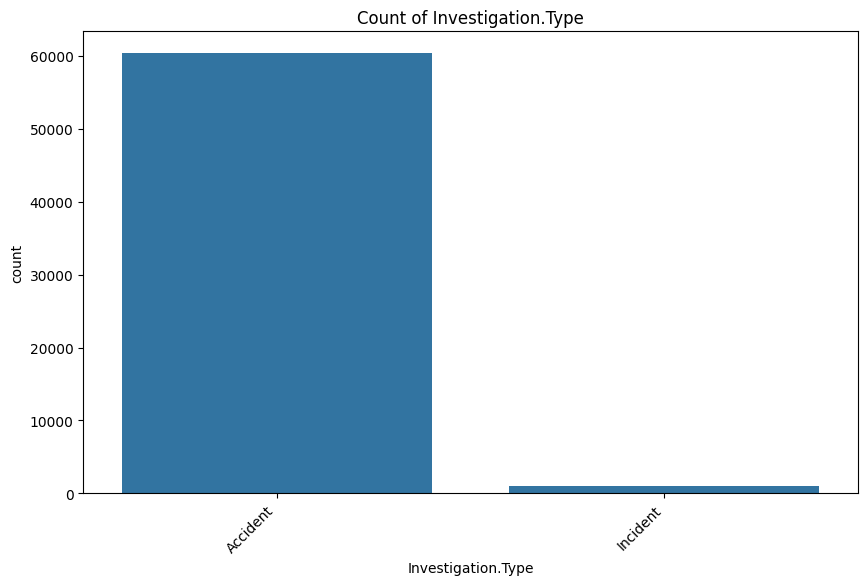

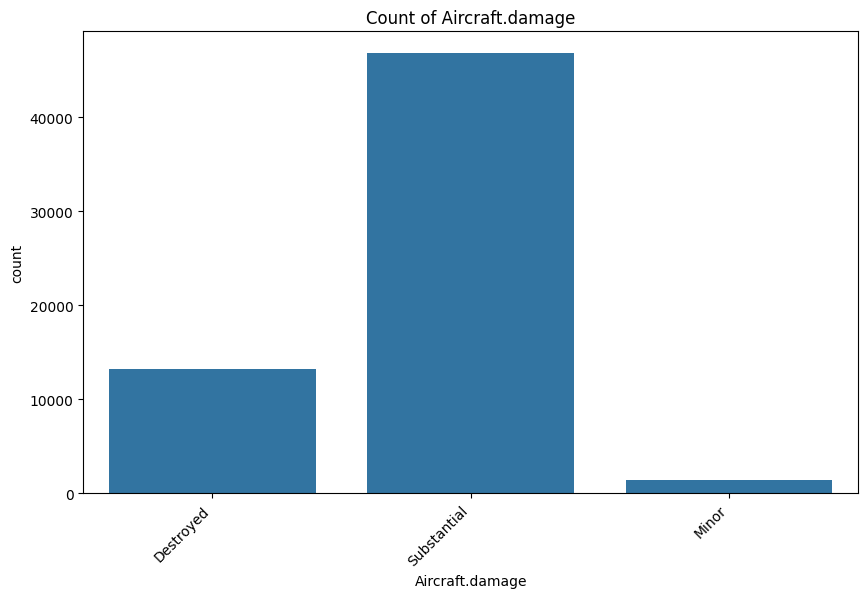

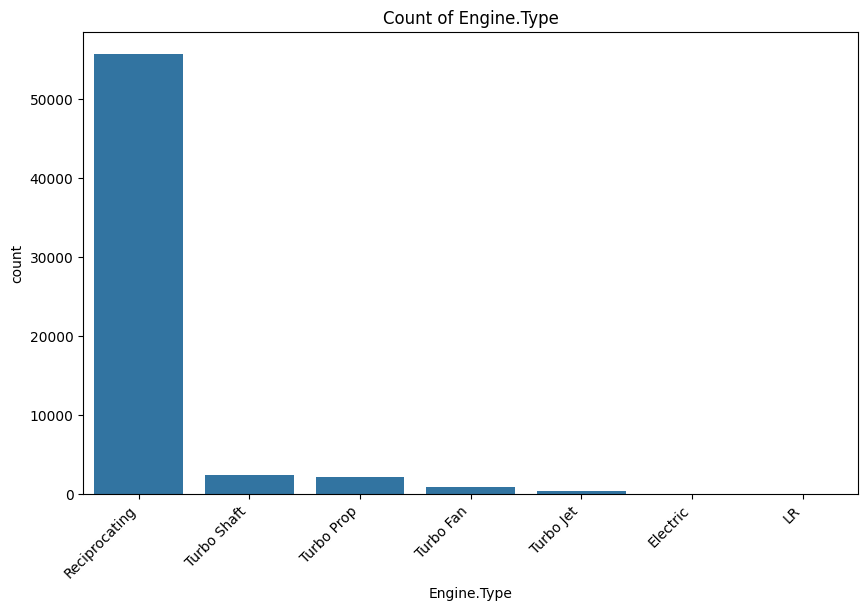

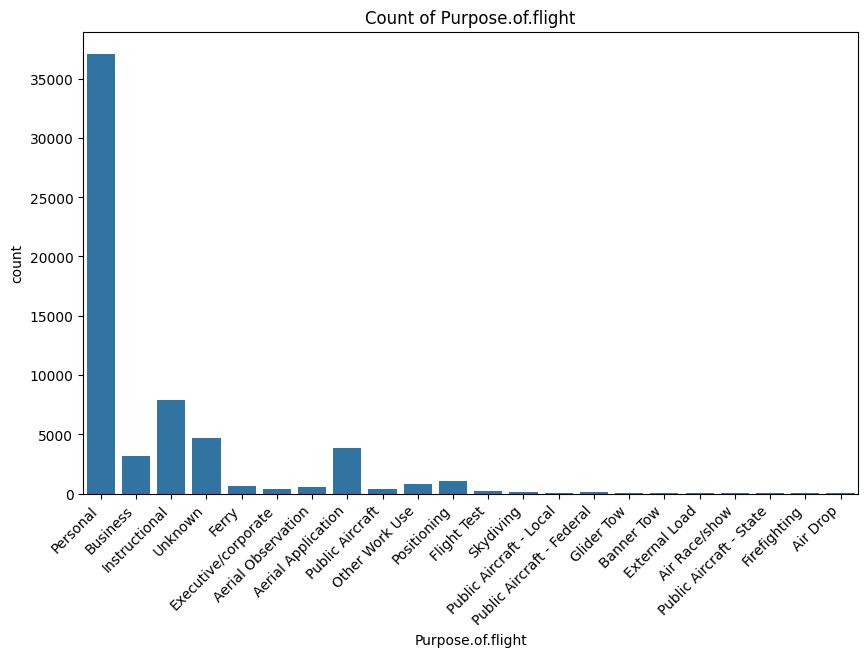

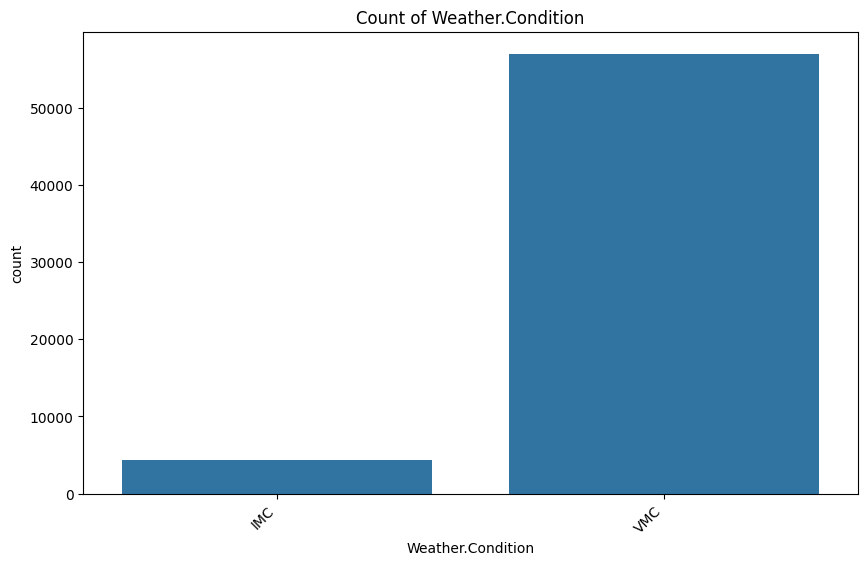

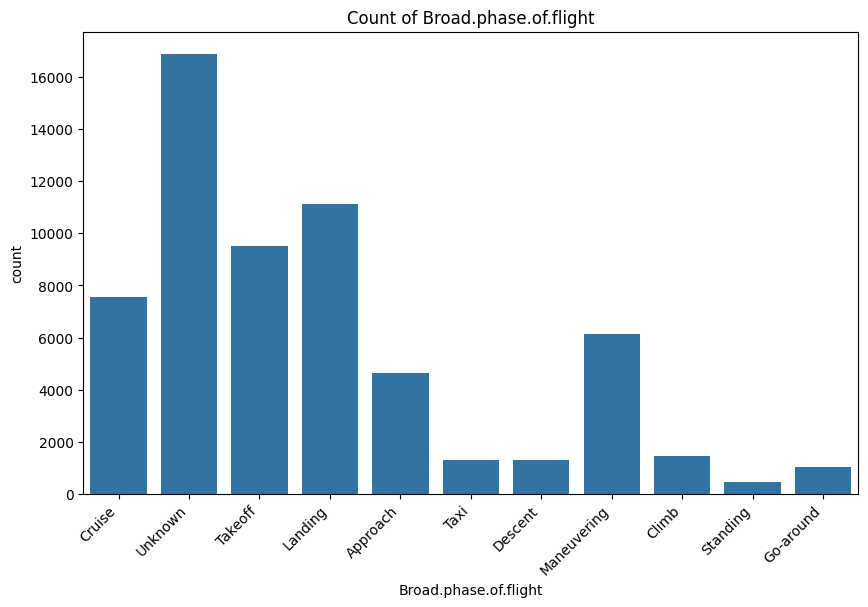

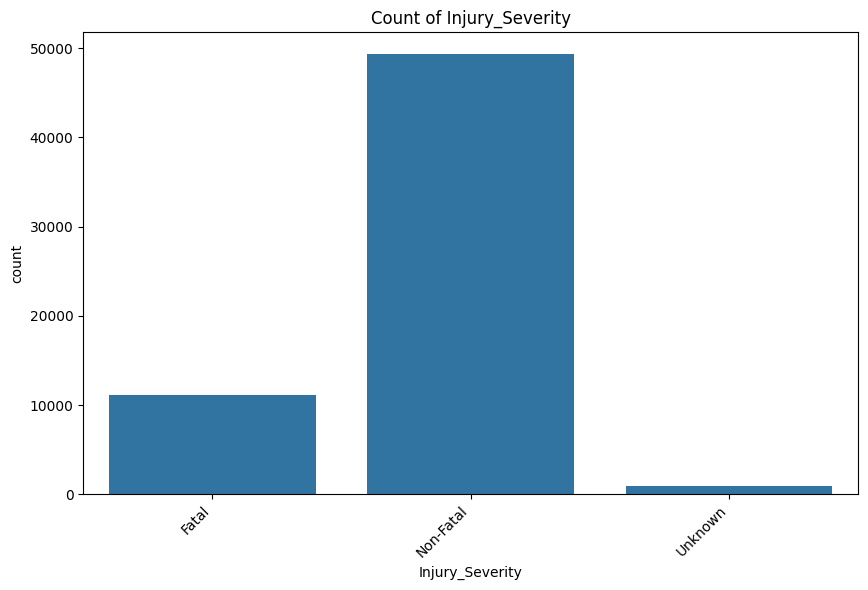

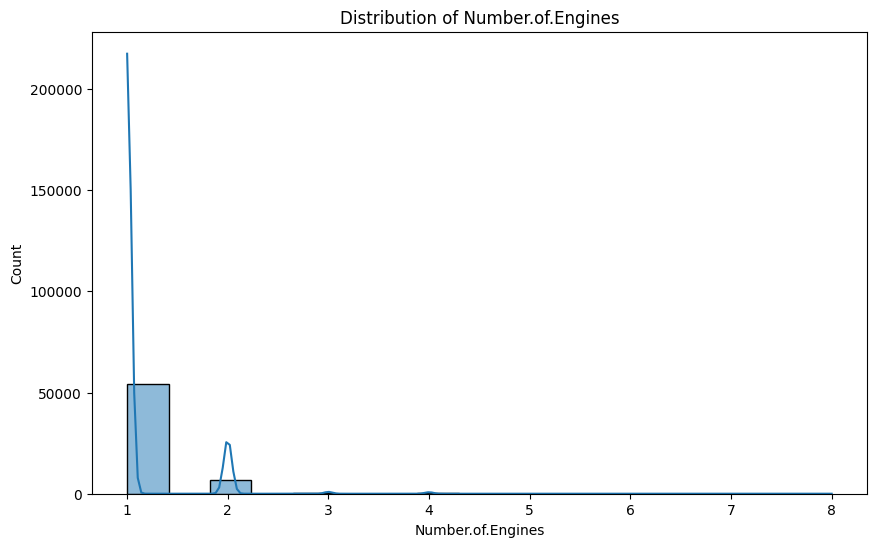

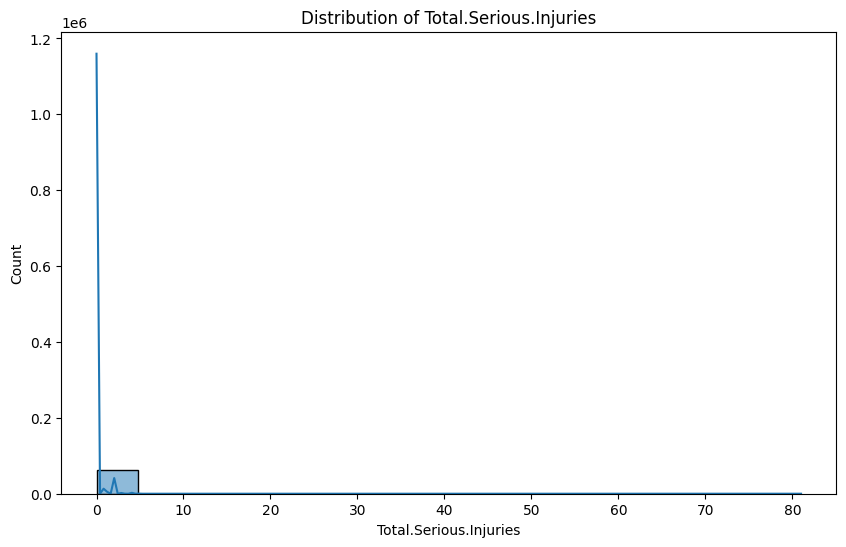

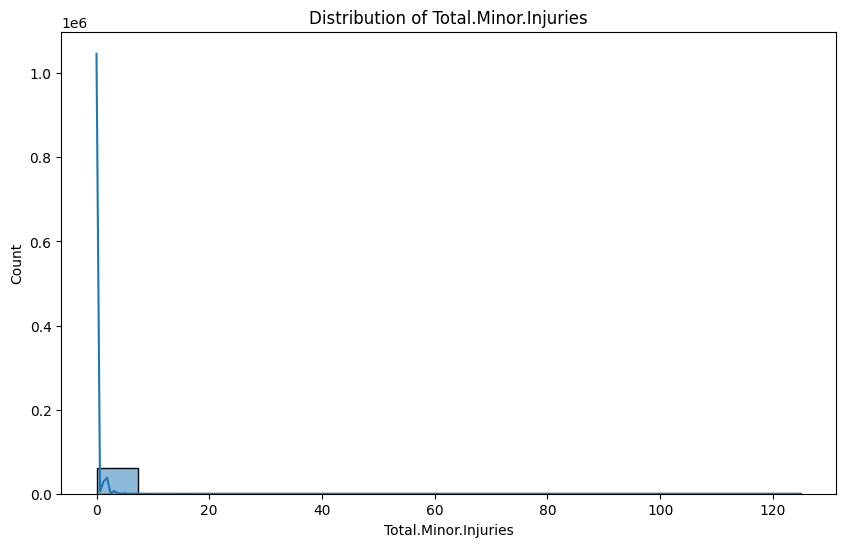

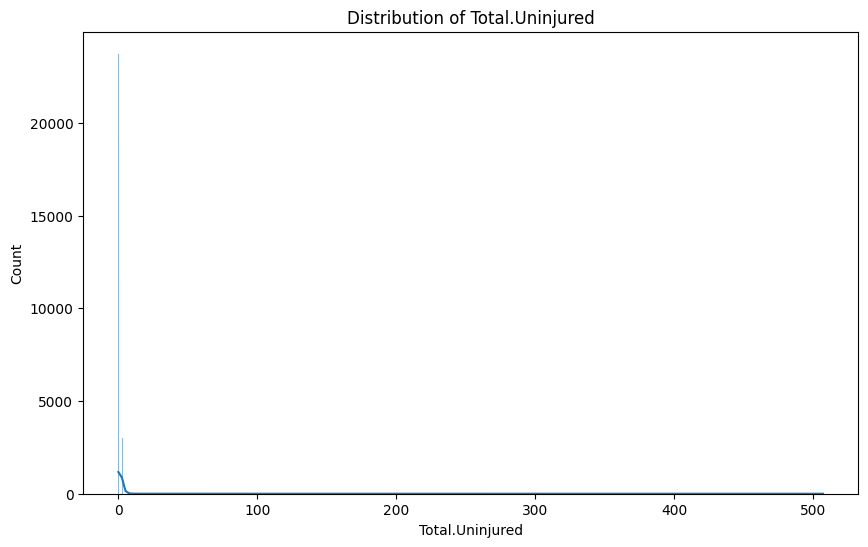

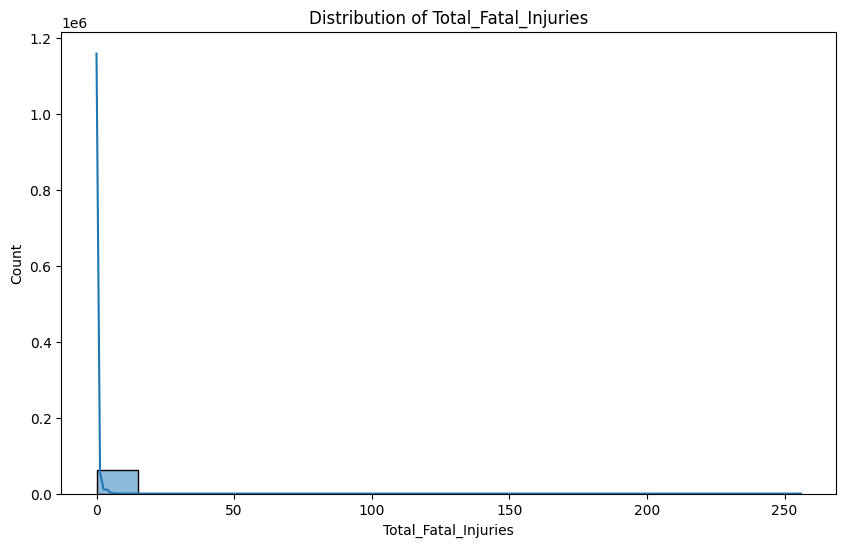

In [ ]:
# Function to visualize categorical columns
def visualize_categorical(data, column):
    plt.figure(figsize=(10, 6))
    sns.countplot(data=data, x=column)
    plt.title(f'Count of {column}')
    plt.xticks(rotation=45, ha='right')
    plt.show()

# Function to visualize numerical columns
def visualize_numerical(data, column):
    plt.figure(figsize=(10, 6))
    sns.histplot(data=data, x=column, kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

# Visualize each column
categorical_columns = ['Investigation.Type', 'Aircraft.damage','Engine.Type', 'Purpose.of.flight', 'Weather.Condition', 'Broad.phase.of.flight', 'Injury_Severity']
numerical_columns = ['Number.of.Engines', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured', 'Total_Fatal_Injuries']

for column in categorical_columns:
    visualize_categorical(df_cleaned, column)

for column in numerical_columns:
    visualize_numerical(df_cleaned, column)


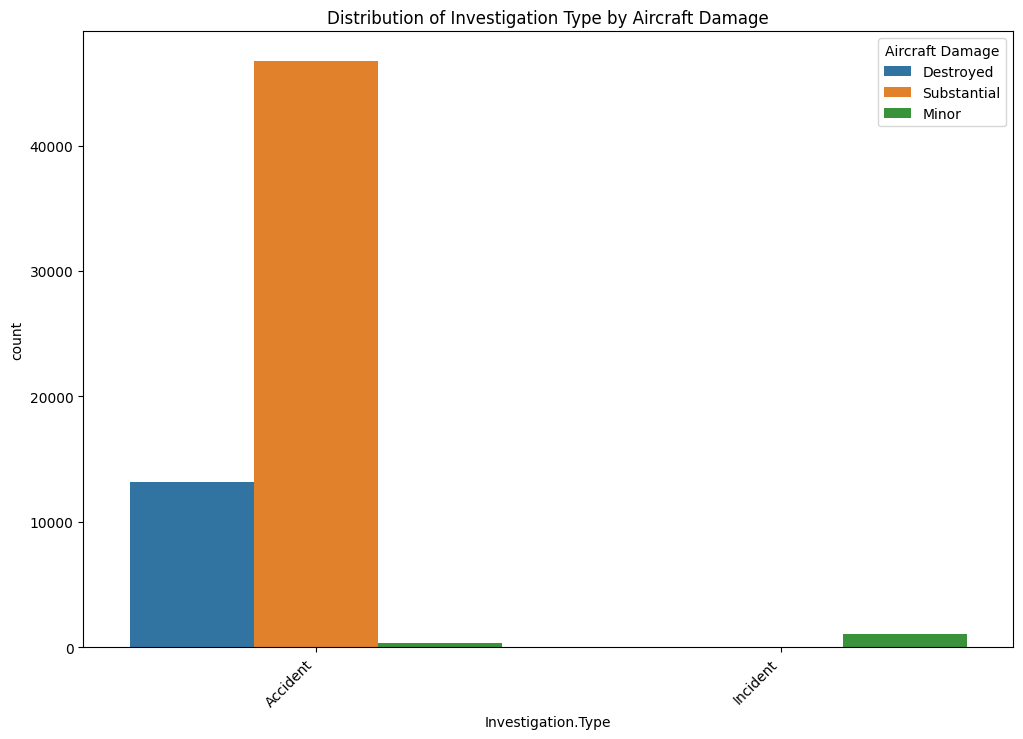

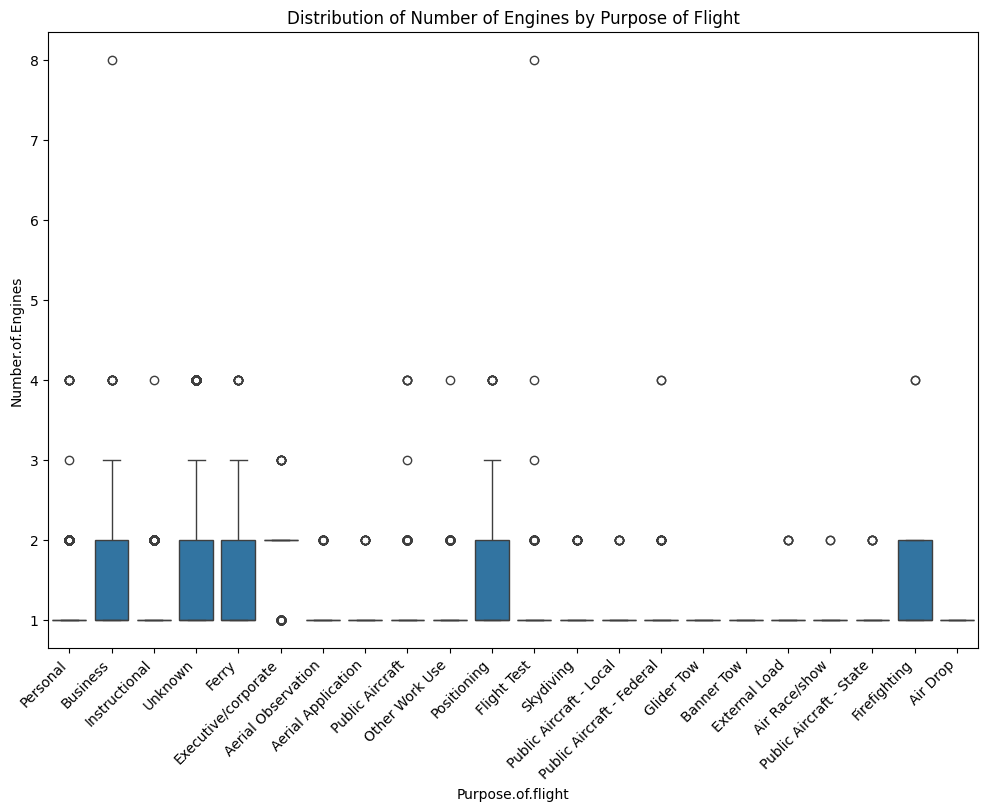

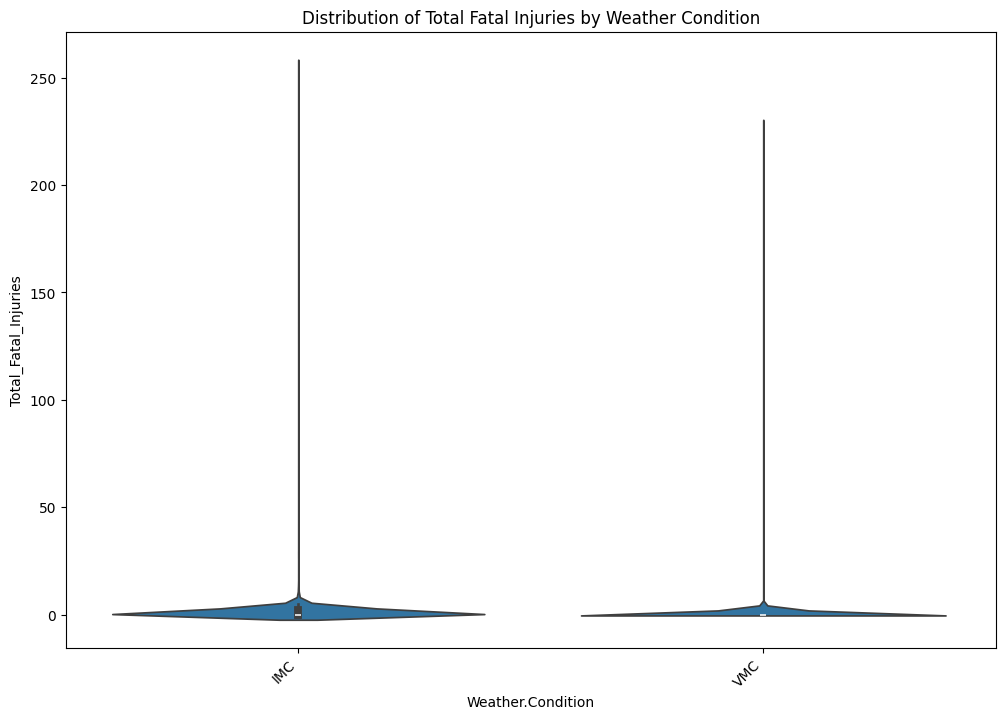

In [ ]:
# Visualize relationships between columns
plt.figure(figsize=(12, 8))

# Categorical vs. Categorical: Stacked Bar Plot
sns.countplot(data=df_cleaned, x='Investigation.Type', hue='Aircraft.damage')
plt.title('Distribution of Investigation Type by Aircraft Damage')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Aircraft Damage')
plt.show()

# Categorical vs. Numerical: Box Plot
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_cleaned, x='Purpose.of.flight', y='Number.of.Engines')
plt.title('Distribution of Number of Engines by Purpose of Flight')
plt.xticks(rotation=45, ha='right')
plt.show()

# Categorical vs. Numerical: Violin Plot
plt.figure(figsize=(12, 8))
sns.violinplot(data=df_cleaned, x='Weather.Condition', y='Total_Fatal_Injuries')
plt.title('Distribution of Total Fatal Injuries by Weather Condition')
plt.xticks(rotation=45, ha='right')
plt.show()


<ipython-input-63-52c89dfbc920>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_makers.index, y=top_makers.values, palette='magma')


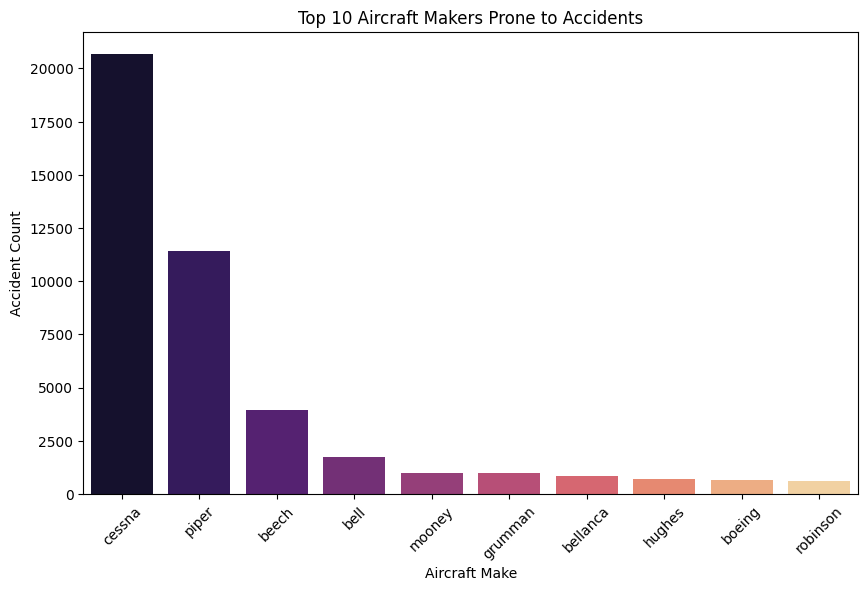

<ipython-input-63-52c89dfbc920>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weather_counts.index, y=weather_counts.values, palette='coolwarm')


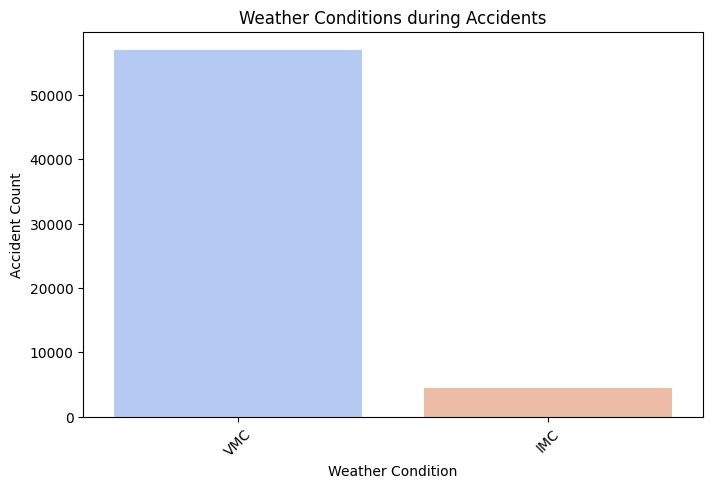

In [ ]:
 # Top 10 Aircraft Makers Prone to Accidents
top_makers = df_cleaned['Make'].value_counts().nlargest(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_makers.index, y=top_makers.values, palette='magma')
plt.title('Top 10 Aircraft Makers Prone to Accidents')
plt.xlabel('Aircraft Make')
plt.ylabel('Accident Count')
plt.xticks(rotation=45)
plt.show()

# Weather Conditions during Accidents
weather_counts = df_cleaned['Weather.Condition'].value_counts()

plt.figure(figsize=(8, 5))
sns.barplot(x=weather_counts.index, y=weather_counts.values, palette='coolwarm')
plt.title('Weather Conditions during Accidents')
plt.xlabel('Weather Condition')
plt.ylabel('Accident Count')
plt.xticks(rotation=45)
plt.show()


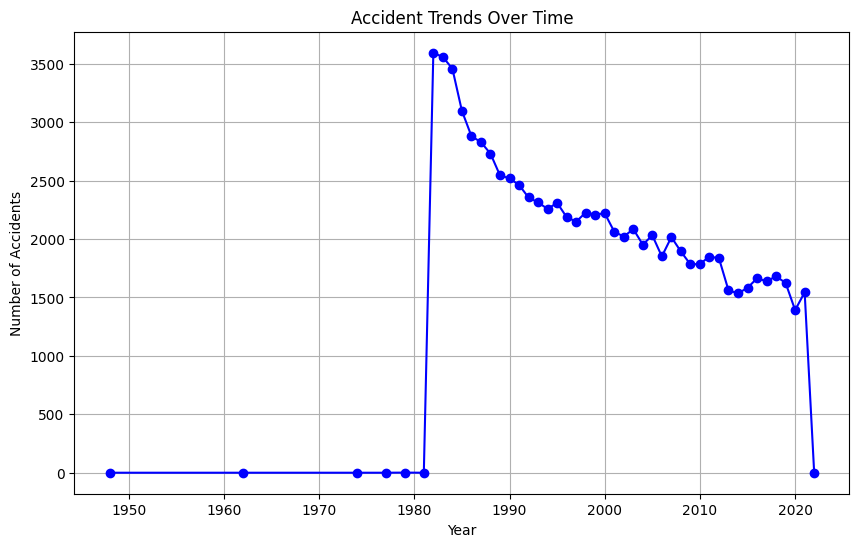

In [ ]:
# Visualization of Accident Trends Over Time
df['Event.Date'] = pd.to_datetime(df['Event.Date'])
df['Year'] = df['Event.Date'].dt.year
accidents_by_year = df.groupby('Year')['Event.Id'].count()

plt.figure(figsize=(10, 6))
plt.plot(accidents_by_year.index, accidents_by_year.values, marker='o', color='b')
plt.title('Accident Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.show()


# Hot Coding Categorical Columns

In [ ]:
# One-hot encode Investigation.Type
investigation_type_encoded = pd.get_dummies(df_cleaned['Investigation.Type'], prefix='Investigation_Type').astype(int)


# Convert Amateur.Built to numerical values (0 and 1)
# df_cleaned['Amateur.Built'] = df_cleaned['Amateur.Built'].astype(int)

# One-hot encode Engine.Type
engine_type_encoded = pd.get_dummies(df_cleaned['Engine.Type'], prefix='Engine_Type').astype(int)

# One-hot encode Purpose.of.flight
purpose_of_flight_encoded = pd.get_dummies(df_cleaned['Purpose.of.flight'], prefix='Purpose_Of_Flight').astype(int)

# Aggregate Total.Serious.Injuries, Total.Minor.Injuries, Total.Uninjured
df_cleaned['Total_Injuries'] = df_cleaned['Total.Serious.Injuries'] + df_cleaned['Total.Minor.Injuries']

# One-hot encode Weather.Condition
weather_condition_encoded = pd.get_dummies(df_cleaned['Weather.Condition'], prefix='Weather_Condition').astype(int)

# One-hot encode Broad.phase.of.flight
phase_of_flight_encoded = pd.get_dummies(df_cleaned['Broad.phase.of.flight'], prefix='Phase_Of_Flight').astype(int)

# One-hot encode Injury_Severity
injury_severity_encoded = pd.get_dummies(df_cleaned['Injury_Severity'], prefix='Injury_Severity').astype(int)

# Drop original columns and concatenate encoded columns
df_cleaned = pd.concat([
    df_cleaned.drop(['Investigation.Type',  'Engine.Type',
                     'Purpose.of.flight', 'Weather.Condition', 'Broad.phase.of.flight',
                      'Injury_Severity', 'Total.Minor.Injuries',
                     'Total.Serious.Injuries', 'Total.Uninjured'], axis=1),
    investigation_type_encoded, engine_type_encoded,
    purpose_of_flight_encoded, weather_condition_encoded, phase_of_flight_encoded,
    injury_severity_encoded
], axis=1)

# Display only the encoded columns
print(df_cleaned.head())
# 'Aircraft.damage',


         Event.Id Accident.Number  Event.Date  \
3  20001218X45448      LAX96LA321  1977-06-19   
6  20001218X45446      CHI81LA106  1981-08-01   
7  20020909X01562      SEA82DA022  1982-01-01   
8  20020909X01561      NYC82DA015  1982-01-01   
9  20020909X01560      MIA82DA029  1982-01-01   

                                            Location        Country  \
3       Eureka, California, United states of america  United States   
6        Cotton, Minnesota, United states of america  United States   
7      Pullman, Washington, United states of america  United States   
8  East hanover, New jersey, United states of ame...  United States   
9    Jacksonville, Florida, United states of america  United States   

  Aircraft.damage            Make         Model Amateur.Built  \
3       Destroyed        rockwell           112         False   
6       Destroyed          cessna           180         False   
7     Substantial          cessna           140         False   
8     Substantial 

In [ ]:
print(df_cleaned.columns)

Index(['Event.Id', 'Accident.Number', 'Event.Date', 'Location', 'Country',
       'Aircraft.damage', 'Make', 'Model', 'Amateur.Built',
       'Number.of.Engines', 'Total_Fatal_Injuries', 'Total_Injuries',
       'Investigation_Type_Accident', 'Investigation_Type_Incident',
       'Engine_Type_Electric', 'Engine_Type_LR', 'Engine_Type_Reciprocating',
       'Engine_Type_Turbo Fan', 'Engine_Type_Turbo Jet',
       'Engine_Type_Turbo Prop', 'Engine_Type_Turbo Shaft',
       'Purpose_Of_Flight_Aerial Application',
       'Purpose_Of_Flight_Aerial Observation', 'Purpose_Of_Flight_Air Drop',
       'Purpose_Of_Flight_Air Race/show', 'Purpose_Of_Flight_Banner Tow',
       'Purpose_Of_Flight_Business', 'Purpose_Of_Flight_Executive/corporate',
       'Purpose_Of_Flight_External Load', 'Purpose_Of_Flight_Ferry',
       'Purpose_Of_Flight_Firefighting', 'Purpose_Of_Flight_Flight Test',
       'Purpose_Of_Flight_Glider Tow', 'Purpose_Of_Flight_Instructional',
       'Purpose_Of_Flight_Other Work U

In [ ]:
# Get an overview of the dataset
print(df_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
Index: 61377 entries, 3 to 86955
Data columns (total 59 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Event.Id                                     61377 non-null  object 
 1   Accident.Number                              61377 non-null  object 
 2   Event.Date                                   61377 non-null  object 
 3   Location                                     61377 non-null  object 
 4   Country                                      61377 non-null  object 
 5   Aircraft.damage                              61377 non-null  object 
 6   Make                                         61377 non-null  object 
 7   Model                                        61377 non-null  object 
 8   Amateur.Built                                61377 non-null  object 
 9   Number.of.Engines                            61377 non-null  float64
 10  Tot

In [ ]:
# Calculate the percentage of null values in each column
null_percentages = (df_cleaned.isnull().sum() / len(df_cleaned)) * 100

# Display the null percentages
print("Null percentages:")
print(null_percentages)

Null percentages:
Event.Id                                       0.0
Accident.Number                                0.0
Event.Date                                     0.0
Location                                       0.0
Country                                        0.0
Aircraft.damage                                0.0
Make                                           0.0
Model                                          0.0
Amateur.Built                                  0.0
Number.of.Engines                              0.0
Total_Fatal_Injuries                           0.0
Total_Injuries                                 0.0
Investigation_Type_Accident                    0.0
Investigation_Type_Incident                    0.0
Engine_Type_Electric                           0.0
Engine_Type_LR                                 0.0
Engine_Type_Reciprocating                      0.0
Engine_Type_Turbo Fan                          0.0
Engine_Type_Turbo Jet                          0.0
Engine_Type_T

In [ ]:
# Drop rows with null values
df_cleaned.dropna(inplace=True)

# Calculate the percentage of null values in each column
null_percentages = (df_cleaned.isnull().sum() / len(df_cleaned)) * 100

# Display the null percentages
print("Null percentages after dropping rows with null values:")
print(null_percentages)


Null percentages after dropping rows with null values:
Event.Id                                       0.0
Accident.Number                                0.0
Event.Date                                     0.0
Location                                       0.0
Country                                        0.0
Aircraft.damage                                0.0
Make                                           0.0
Model                                          0.0
Amateur.Built                                  0.0
Number.of.Engines                              0.0
Total_Fatal_Injuries                           0.0
Total_Injuries                                 0.0
Investigation_Type_Accident                    0.0
Investigation_Type_Incident                    0.0
Engine_Type_Electric                           0.0
Engine_Type_LR                                 0.0
Engine_Type_Reciprocating                      0.0
Engine_Type_Turbo Fan                          0.0
Engine_Type_Turbo Jet      

In [ ]:
# Get an overview of the dataset
print(df_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
Index: 61377 entries, 3 to 86955
Data columns (total 59 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Event.Id                                     61377 non-null  object 
 1   Accident.Number                              61377 non-null  object 
 2   Event.Date                                   61377 non-null  object 
 3   Location                                     61377 non-null  object 
 4   Country                                      61377 non-null  object 
 5   Aircraft.damage                              61377 non-null  object 
 6   Make                                         61377 non-null  object 
 7   Model                                        61377 non-null  object 
 8   Amateur.Built                                61377 non-null  object 
 9   Number.of.Engines                            61377 non-null  float64
 10  Tot

# **Building Model with GradientBoostingRegressor**

In [ ]:
# Before encoding
print("Before Label Encoding:")
print(df_cleaned['Aircraft.damage'].unique())

Before Label Encoding:
['Destroyed' 'Substantial' 'Minor']


In [ ]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()



# Fit and transform the Event ID column
df_cleaned['Event.Id'] = label_encoder.fit_transform(df_cleaned['Event.Id'])
df_cleaned['Accident.Number'] = label_encoder.fit_transform(df_cleaned['Accident.Number'])
df_cleaned['Event.Date'] = label_encoder.fit_transform(df_cleaned['Event.Date'])
df_cleaned['Location'] = label_encoder.fit_transform(df_cleaned['Location'])
df_cleaned['Country'] = label_encoder.fit_transform(df_cleaned['Country'])
df_cleaned['Aircraft.damage'] = label_encoder.fit_transform(df_cleaned['Aircraft.damage'])
df_cleaned['Make'] = label_encoder.fit_transform(df_cleaned['Make'])
df_cleaned['Model'] = label_encoder.fit_transform(df_cleaned['Model'])






In [ ]:
# After encoding
print("\nAfter Label Encoding:")
print(df_cleaned['Aircraft.damage'].unique())


After Label Encoding:
[0 2 1]


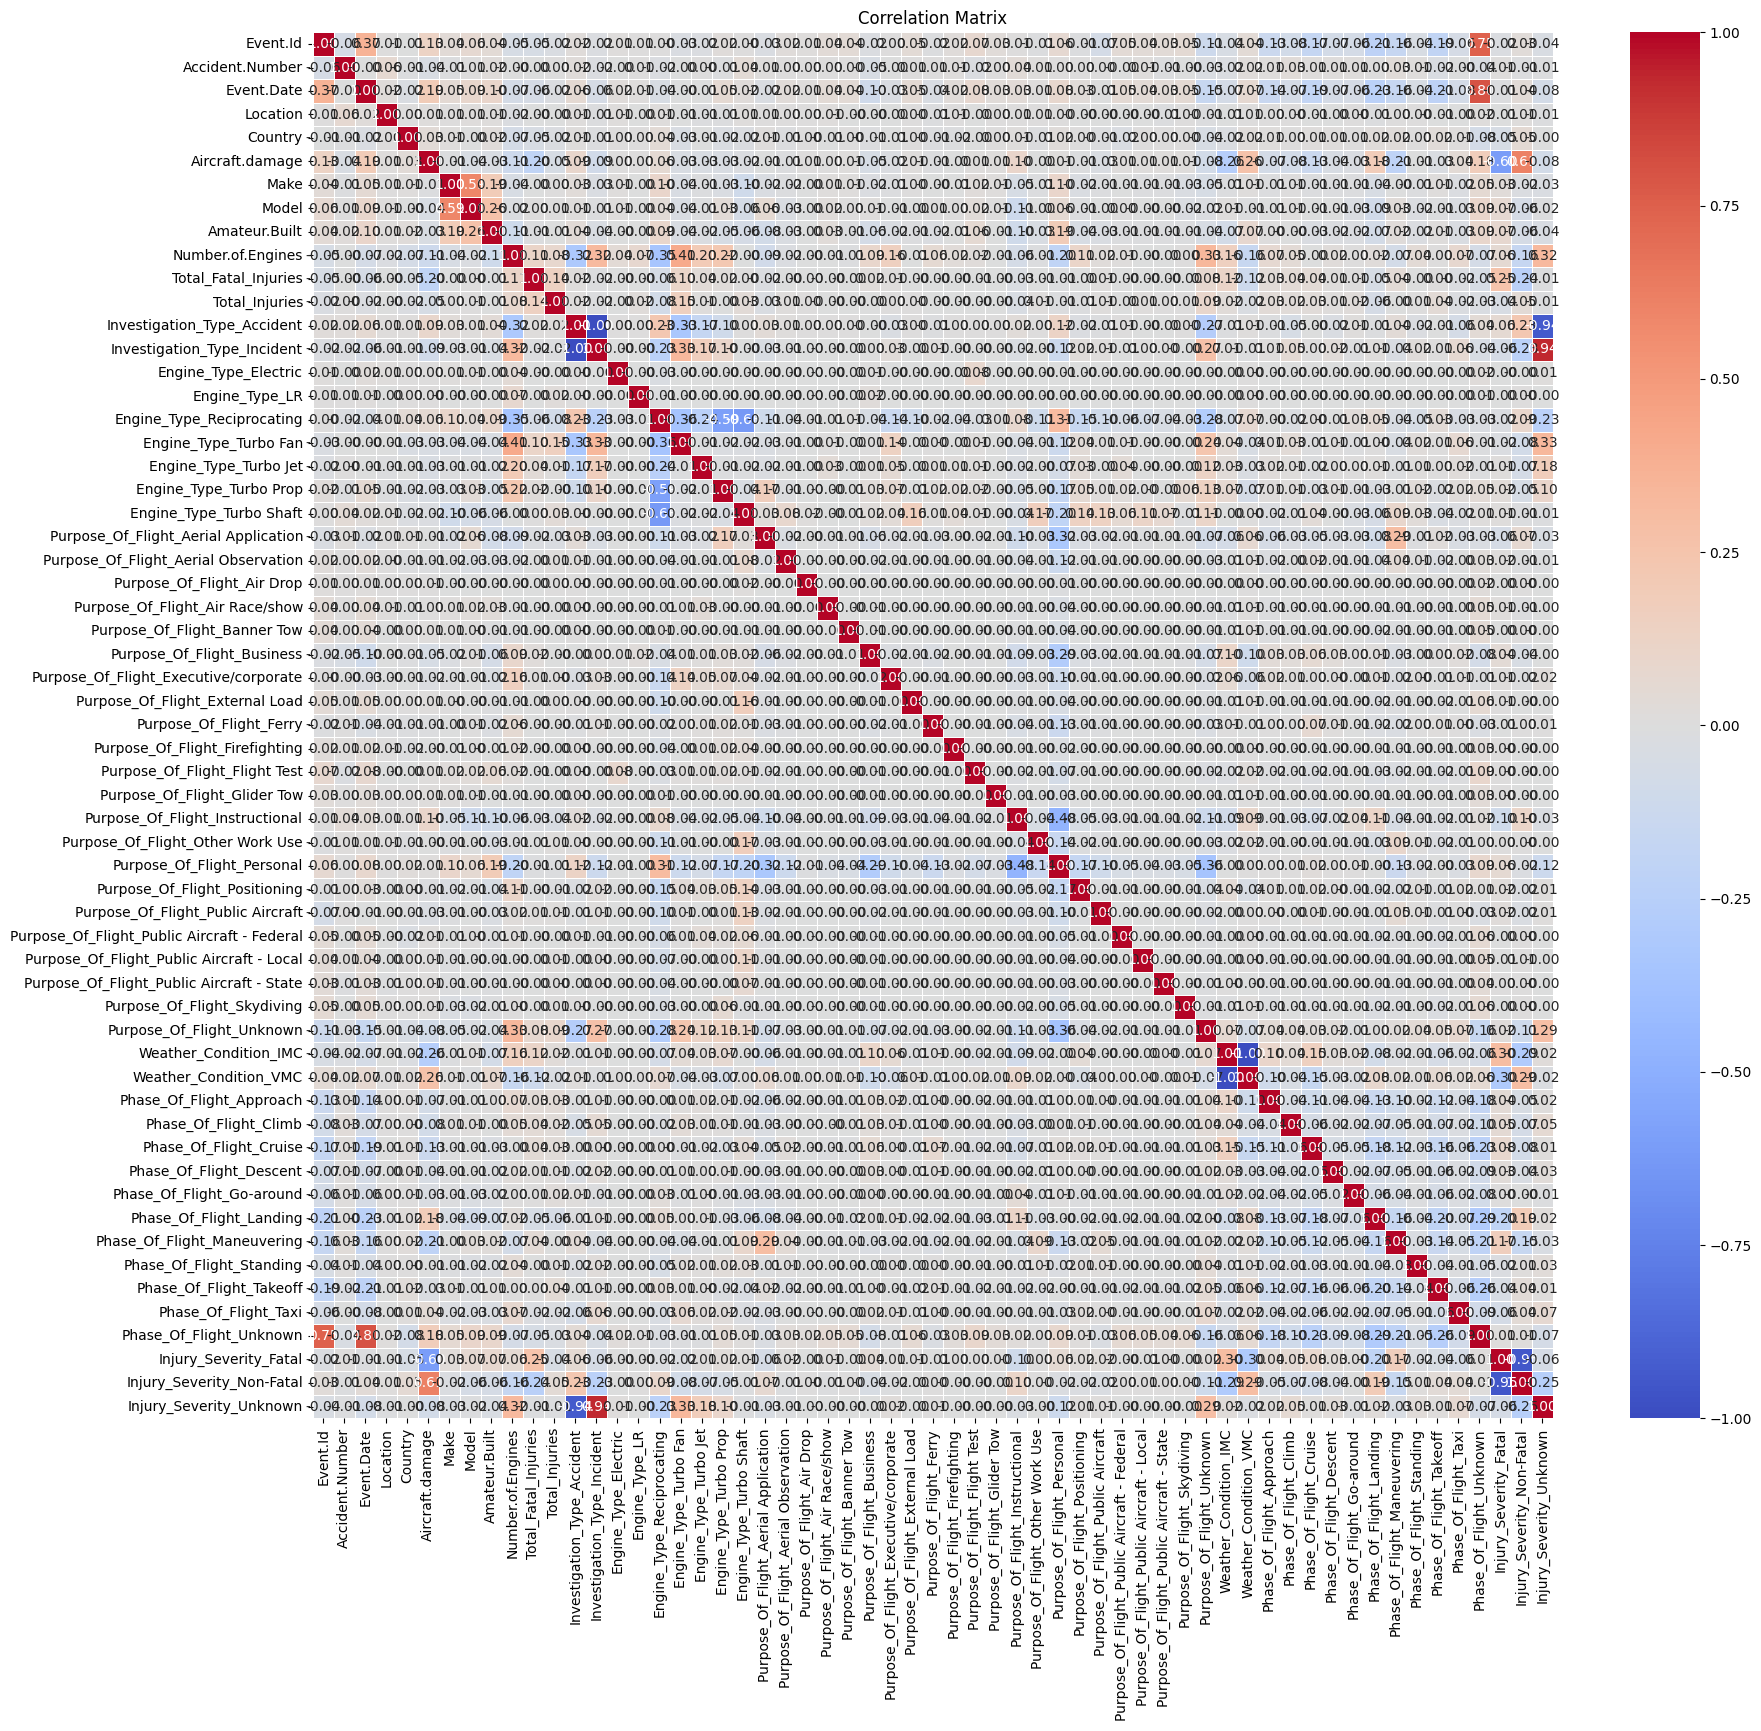

In [ ]:
# Compute the correlation matrix
correlation_matrix = df_cleaned.corr()

# Set up the matplotlib figure
plt.figure(figsize=(20, 18))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Split features and target variable
X = df_cleaned.drop(columns=['Aircraft.damage'])  # Features
y = df_cleaned[['Aircraft.damage']]  # Target variable


In [ ]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Create a Gradient Boosting Classifier model
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Train the model
gb_classifier.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(random_state=42)

In [ ]:
# Make predictions on the test set
y_pred = gb_classifier.predict(X_test)

In [ ]:
# Predict on the test set
y_pred = gb_classifier.predict(X_test)

# Compute F1 score
f1 = f1_score(y_test, y_pred, average='weighted')

# Compute precision
precision = precision_score(y_test, y_pred, average='weighted')

# Compute recall
recall = recall_score(y_test, y_pred, average='weighted')

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)

print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("Accuracy:", accuracy)


F1 Score: 0.8767141331175882
Precision: 0.8823123097818842
Recall: 0.8843271423916585
Accuracy: 0.8843271423916585


In [ ]:
# Generate classification report
class_report = classification_report(y_test, y_pred)

# Print the classification report
print("Classification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.60      0.70      2687
           1       0.96      0.78      0.86       265
           2       0.89      0.97      0.93      9324

    accuracy                           0.88     12276
   macro avg       0.90      0.78      0.83     12276
weighted avg       0.88      0.88      0.88     12276



# **Building Model Using RandomForestRegressor**

In [ ]:
# Create a Random Forest Classifier model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)


<ipython-input-81-2d117b369dc2>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

In [ ]:
# Predict on the test set
y_pred = gb_classifier.predict(X_test)

# Compute F1 score
f1 = f1_score(y_test, y_pred, average='weighted')

# Compute precision
precision = precision_score(y_test, y_pred, average='weighted')

# Compute recall
recall = recall_score(y_test, y_pred, average='weighted')

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)

print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("Accuracy:", accuracy)


F1 Score: 0.8767141331175882
Precision: 0.8823123097818842
Recall: 0.8843271423916585
Accuracy: 0.8843271423916585


In [ ]:
# Generate classification report
class_report = classification_report(y_test, y_pred)

# Print the classification report
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.60      0.70      2687
           1       0.96      0.78      0.86       265
           2       0.89      0.97      0.93      9324

    accuracy                           0.88     12276
   macro avg       0.90      0.78      0.83     12276
weighted avg       0.88      0.88      0.88     12276



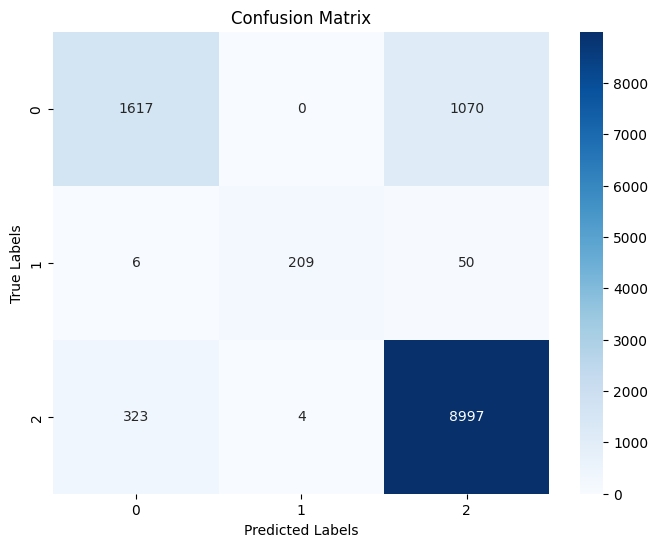

In [ ]:
# Predict the labels for the test set
y_pred = rf_classifier.predict(X_test)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

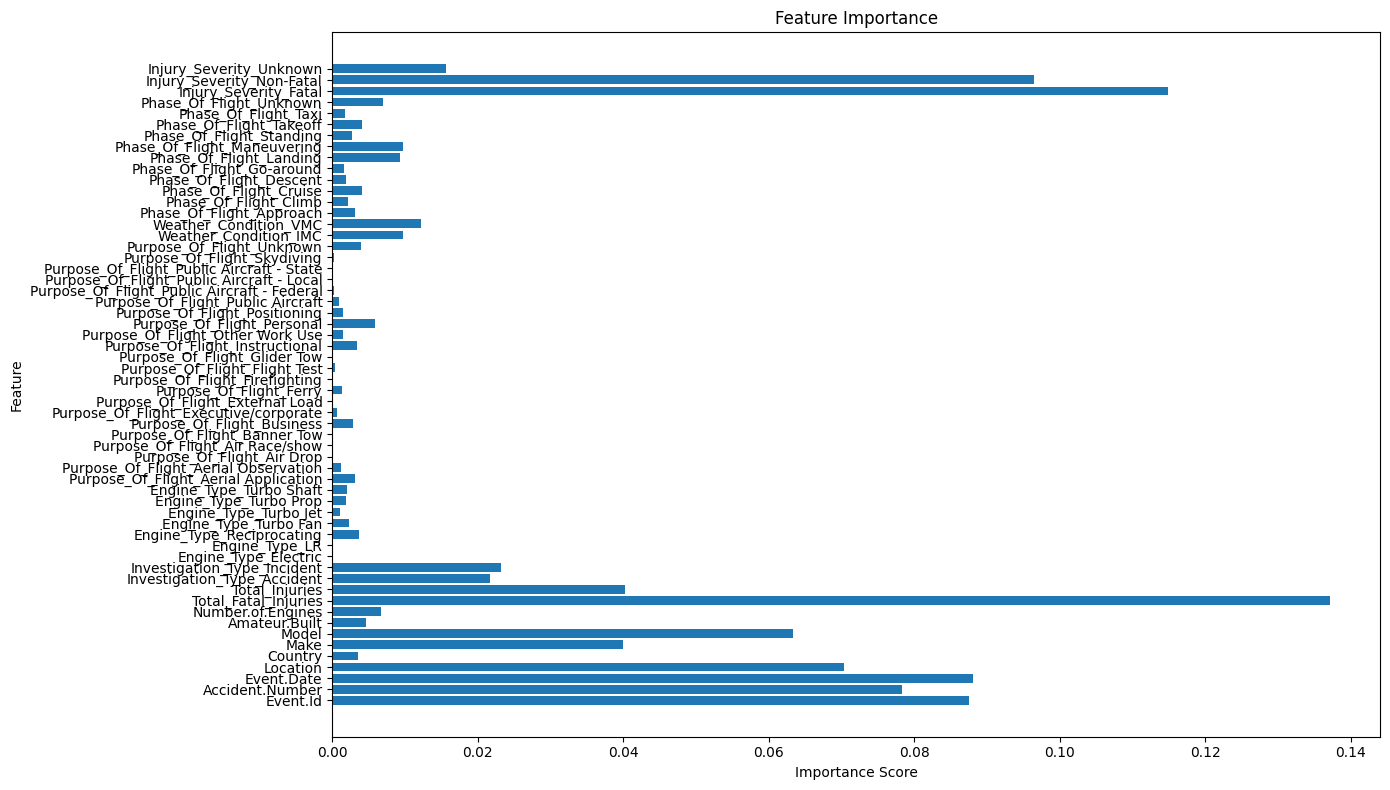

In [ ]:
# Get feature importance
importances = rf_classifier.feature_importances_

# Get column names
column_names = X.columns

# Set up the plot with wider figure width
plt.figure(figsize=(14, 8))

# Create the bar plot
plt.barh(range(len(importances)), importances, tick_label=column_names)

# Set labels and title
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Feature Importance')

# Show plot
plt.tight_layout()
plt.show()
